In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import bk.load
import neuroseries as nts

In [50]:
import matplotlib as mpl
# COLOR = 'white'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['axes.edgecolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR
# mpl.rcParams['figure.facecolor'] = '#282C34'
# mpl.rcParams['axes.facecolor'] = '#282C34'
mpl.rcParams['svg.fonttype'] = 'none'
# %matplotlib qt

In [22]:
def epochs_length(local_path = 'Rat08/Rat08-20130713',args = ['s',5]):
    time_units = args[0]
    epochs = {}
    
    bk.load.current_session_linux(local_path=local_path)
    states = bk.load.states()
    
    for s,intervals in states.items():
        epochs.update({s:np.array(intervals.as_units(time_units).end-intervals.as_units(time_units).start)})
    
    return epochs

In [53]:
def merge_epochs(epochs,rat = None):
    
    epochs = dict(epochs) # %Make a copy beaucse we are going to change the dict here
    merged_epochs =  {}
    
    if rat != None:
        discard = [s for s in epochs if not s.startswith(f'Rat{rat:02}')]
        for d in discard: epochs.pop(d)
    
    for values in epochs.values(): 
        keys = values.keys()
        break
    #Init the dict with empty list
    
    
    for k in keys:
        merged_epochs.update({k:[]})
        for s,e in epochs.items():
                merged_epochs[k].append(e[k])
        merged_epochs[k] = np.hstack(merged_epochs[k]) 
    
    return merged_epochs

In [13]:
epochs = bk.load.batch(epochs_length,args = ['s'],linux=True)

100%|██████████| 61/61 [00:00<00:00, 71.36it/s]

Batch finished in 0.8961484432220459
Some session were not processed correctly
['Rat08-20130720', 'Rat08-20130722']
3.278688524590164 %


In [27]:
merged_epochs = merge_epochs(epochs,10)

In [42]:
bins = np.logspace(np.log10(1),np.log10(2500), 100)

<ipython-input-70-bc559b4707b1>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


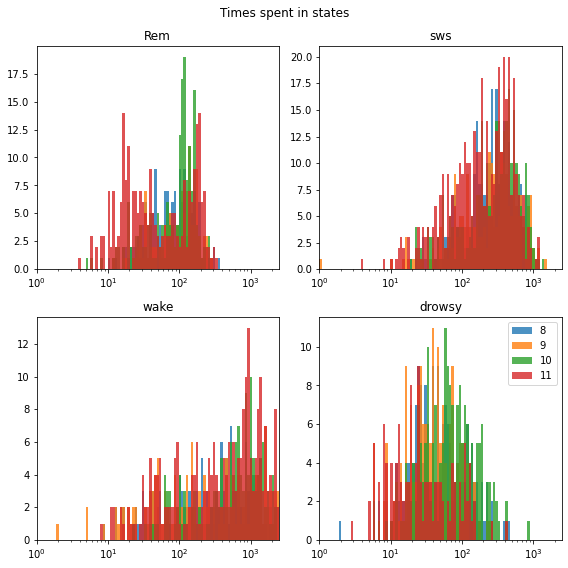

In [70]:
rats = [8,9,10,11]
plt.figure(figsize=(8,8))
for r in rats:
    merged_epochs = merge_epochs(epochs,r)

    for i,(k,m) in enumerate(merged_epochs.items(),1):
        plt.subplot(2,2,i)
        plt.title(k)
        plt.semilogx()
        plt.hist(m,bins,alpha = 0.8)
        plt.xlim(1,2500)


plt.suptitle('Times spent in states')
plt.legend(rats)
plt.tight_layout()
plt.savefig('/mnt/work/Figures_Gabrielle/per_rat_states_length.png')

In [65]:
plt.savefig('/mnt/work/Figures_Gabrielle/all_states_lengtha.png')

<Figure size 432x288 with 0 Axes>